In [127]:
# importación de las librerias que serán utilizadas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [128]:
data1 = '../join by type data/train1&2.csv'
data2 = '../join by type data/train3&4&5.csv'
data3 = pd.read_csv('../final data/test_x.csv')

In [129]:
dataFrame = pd.concat(
map(pd.read_csv, [data1, data2]), ignore_index=True)

In [130]:
dataFrame

,Unnamed: 0,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,...,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID,EPRTRAnnexIMainActivityCode,EPRTRSectorCode
0,0,Germany,Mineral industry,Installations for the production of cement cli...,https://registry.gdi-de.org/id/de.ni.mu/062217...,Holcim (Deutschland) GmbH Werk Höver,Sehnde,AIR,Carbon dioxide (CO2),2015,...,14.312541,21.419106,2.864895,4.924169,9.688206,2,Mr. Jacob Ortega,7cdb5e74adcb2ffaa21c1b61395a984f,NaN,NaN
1,1,Italy,Mineral industry,Installations for the production of cement cli...,IT.CAED/240602021.FACILITY,Stabilimento di Tavernola Bergamasca,TAVERNOLA BERGAMASCA,AIR,Nitrogen oxides (NOX),2018,...,19.368166,21.756389,5.462839,7.864403,12.023521,1,Ashlee Serrano,cd1dbabbdba230b828c657a9b19a8963,NaN,NaN
2,2,Spain,Waste and wastewater management,Landfills (excluding landfills of inert waste ...,ES.CAED/001966000.FACILITY,COMPLEJO MEDIOAMBIENTAL DE ZURITA,PUERTO DEL ROSARIO,AIR,Methane (CH4),2019,...,14.701985,17.103930,1.511201,4.233438,8.632193,2,Vincent Kemp,5011e3fa1436d15b34f1287f312fbada,NaN,NaN
3,3,Czechia,Energy sector,Thermal power stations and other combustion in...,CZ.MZP.U422/CZ34736841.FACILITY,Elektrárny Prunéřov,Kadaň,AIR,Nitrogen oxides (NOX),2012,...,16.122584,17.537184,10.970301,10.298348,15.179215,0,Carol Gray,37a6d7a71c4f7c2469e4f01b70dd90c2,NaN,NaN
4,4,Finland,Waste and wastewater management,Urban waste-water treatment plants,http://paikkatiedot.fi/so/1002031/pf/Productio...,"TAMPEREEN VESI LIIKELAITOS, VIINIKANLAHDEN JÄT...",Tampere,AIR,Methane (CH4),2018,...,20.201604,21.536012,11.772039,11.344078,16.039004,2,Blake Ford,471fe554e1c62d1b01cc8e4e5076c61a,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65622,10815,Finland,Energy sector,Thermal power stations and other combustion in...,http://paikkatiedot.fi/so/1002031/pf/Productio...,"Fortum Power and Heat Oy, Suomenojan voimalaitos",Espoo,AIR,Carbon dioxide (CO2),2015,...,20.879613,25.941417,10.277047,12.077852,16.505889,2,Patricia Lyons,2ee91cb5d0c0c4eb2afa916595d3f4f1,1(c),1.0
65623,34052,Hungary,Mineral industry,Installations for the production of cement cli...,HU.OKIR/100401517.FACILITY,Duna-Dráva Cement Kft.,Vác,AIR,Carbon dioxide (CO2),2019,...,21.416038,27.603703,5.455915,7.584531,10.029289,0,Steven Ritter,8affe342c1d1e198d791e9fc1dbf762b,3(c)(i),3.0
65624,39238,Italy,Energy sector,Mineral oil and gas refineries,IT.EEA/412.FACILITY,RAFFINERIA DI SANNAZZARO DE' BURGONDI,SANNAZZARO DE' BURGONDI,AIR,Carbon dioxide (CO2),2011,...,15.091145,20.758241,9.554774,12.279701,14.124705,2,Erica Hill,ec3e4987f24372370aadb2bfceb29a3f,1(a),1.0
65625,65580,Spain,Energy sector,Thermal power stations and other combustion in...,ES.CAED/005651000.FACILITY,ESTACIÓN DE COMPRESIÓN DE ALMENDRALEJO,ALMENDRALEJO,AIR,Nitrogen oxides (NOX),2019,...,14.976226,16.103081,5.722691,8.053115,9.252085,1,Michael Love,4e3b7d5766f7eacc1add8911ba516eee,1(c),1.0


In [131]:
data3

,test_index,countryName,EPRTRSectorCode,eprtrSectorName,EPRTRAnnexIMainActivityCode,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,...,CONTINENT,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID
0,0,Poland,3,Mineral industry,3(a),Underground mining and related operations,PL.MŚ/000002357.FACILITY,Polska Grupa Górnicza sp. z o.o. Oddział KWK R...,Rydułtowy,AIR,...,EUROPE,14.080054,14.855940,18.474836,10.278561,11.381181,13.480752,1,Brittany Buck,826b1de9dad293ae3e4f9cbaf6cf3420
1,1,Luxembourg,5,Waste and wastewater management,5(d),Landfills (excluding landfills of inert waste ...,LU.CAED/000012000.FACILITY,Sidec,Diekirch,AIR,...,EUROPE,16.052425,17.623877,22.622900,6.625910,8.840137,13.422924,0,Lauren Fisher,ed30a6667b40ba0a66198b3173e7353f
2,2,Netherlands,1,Energy sector,1(c),Thermal power stations and other combustion in...,NL.EEA/212857.FACILITY,Nuon Power Generation BV (Eemshaven),Eemshaven,AIR,...,EUROPE,13.647318,15.541979,17.818521,5.669436,8.403322,11.276388,2,Linda Thompson,78e1082c3cfef3bdf3554da8d6afcc34
3,3,Sweden,5,Waste and wastewater management,5(d),Landfills (excluding landfills of inert waste ...,SE.CAED/10013901.Facility,HÖGBYTORPS AVFALLSANLÄGGNING,BRO,AIR,...,EUROPE,16.336762,17.458113,19.961777,6.160560,7.571596,9.443572,2,Bethany Mcmillan,27f959641950d381869d746d7d0e7d4e
4,4,Portugal,1,Energy sector,1(c),Thermal power stations and other combustion in...,PT.EEA/133926.FACILITY,SPCG - Sociedade Portuguesa de Co-Geração Eléc...,SETÚBAL,AIR,...,EUROPE,21.516602,20.532473,21.617137,10.964012,11.548033,12.624114,2,Sarah Hoffman,1cb71655d9e0bd5cedb2320bf5fdd8f7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24475,24475,Austria,1,Energy sector,1(c),Thermal power stations and other combustion in...,AT.CAED/9008390486467.FACILITY,Trans Austria Gasleitung GmbH,Lechen,AIR,...,EUROPE,11.243493,16.527223,18.114884,3.194254,3.901992,6.437241,2,Crystal Ramirez,a4c235acc3cd402a365de2ff369aa5b1
24476,24476,Spain,1,Energy sector,1(c),Thermal power stations and other combustion in...,ES.CAED/003589000.FACILITY,CENTRAL TÉRMICA DE ESCOMBRERAS,CARTAGENA,AIR,...,EUROPE,14.645536,17.044528,24.602476,9.358224,8.708120,13.258552,0,Amber Grant,d43a0adde7c3a944e7ed740a2114e4a9
24477,24477,Finland,5,Waste and wastewater management,5(d),Landfills (excluding landfills of inert waste ...,http://paikkatiedot.fi/so/1002031/pf/Productio...,"Etelä-Karjalan Jätehuolto Oy, Jätekeskus",Konnunsuo,AIR,...,EUROPE,16.789255,18.595172,24.997173,12.047347,14.686131,17.699271,2,Tiffany Smith,1b2b2db0d413ec0745c8c108317b9529
24478,24478,Netherlands,4,Chemical industry,4(b),Chemical installations for the production on a...,NL.RIVM/000104710.FACILITY,ESD-SIC BV,Farmsum,AIR,...,EUROPE,14.899569,17.112356,19.236777,14.977559,17.846682,20.892999,1,Martin Owens,fe708d5280526c56317bf78b26a1dbd3


In [132]:
#Visualizamos la informacion básica del conjunto de datos
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65627 entries, 0 to 65626
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    65627 non-null  int64  
 1   countryName                   65627 non-null  object 
 2   eprtrSectorName               65627 non-null  object 
 3   EPRTRAnnexIMainActivityLabel  65627 non-null  object 
 4   FacilityInspireID             65627 non-null  object 
 5   facilityName                  65627 non-null  object 
 6   City                          65627 non-null  object 
 7   targetRelease                 65627 non-null  object 
 8   pollutant                     65627 non-null  object 
 9   reportingYear                 65627 non-null  int64  
 10  MONTH                         65627 non-null  int64  
 11  DAY                           65627 non-null  int64  
 12  CONTINENT                     65627 non-null  object 
 13  m

In [133]:
#Eliminación de datos que son irrelevantes y que podrian afectar el resultado en ambos dataset.
dataFrame = dataFrame.drop(['Unnamed: 0','EPRTRAnnexIMainActivityLabel','FacilityInspireID','facilityName','REPORTER NAME','CITY ID','EPRTRAnnexIMainActivityCode','countryName','City','EPRTRSectorCode','DAY','MONTH','CONTINENT', 'targetRelease'], axis=1)
data3 = data3.drop(['test_index','EPRTRAnnexIMainActivityLabel','FacilityInspireID','facilityName','REPORTER NAME','CITY ID','EPRTRAnnexIMainActivityCode','countryName','City','EPRTRSectorCode','DAY','MONTH','CONTINENT', 'targetRelease'], axis=1)

In [134]:
dataFrame

,eprtrSectorName,pollutant,reportingYear,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS
0,Mineral industry,Carbon dioxide (CO2),2015,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2
1,Mineral industry,Nitrogen oxides (NOX),2018,19.661550,19.368166,21.756389,5.462839,7.864403,12.023521,1
2,Waste and wastewater management,Methane (CH4),2019,12.729453,14.701985,17.103930,1.511201,4.233438,8.632193,2
3,Energy sector,Nitrogen oxides (NOX),2012,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0
4,Waste and wastewater management,Methane (CH4),2018,17.111930,20.201604,21.536012,11.772039,11.344078,16.039004,2
...,...,...,...,...,...,...,...,...,...,...
65622,Energy sector,Carbon dioxide (CO2),2015,15.504074,20.879613,25.941417,10.277047,12.077852,16.505889,2
65623,Mineral industry,Carbon dioxide (CO2),2019,17.239979,21.416038,27.603703,5.455915,7.584531,10.029289,0
65624,Energy sector,Carbon dioxide (CO2),2011,14.478598,15.091145,20.758241,9.554774,12.279701,14.124705,2
65625,Energy sector,Nitrogen oxides (NOX),2019,10.773204,14.976226,16.103081,5.722691,8.053115,9.252085,1


In [135]:
data3

,eprtrSectorName,reportingYear,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS
0,Mineral industry,2017,14.080054,14.855940,18.474836,10.278561,11.381181,13.480752,1
1,Waste and wastewater management,2008,16.052425,17.623877,22.622900,6.625910,8.840137,13.422924,0
2,Energy sector,2014,13.647318,15.541979,17.818521,5.669436,8.403322,11.276388,2
3,Waste and wastewater management,2011,16.336762,17.458113,19.961777,6.160560,7.571596,9.443572,2
4,Energy sector,2010,21.516602,20.532473,21.617137,10.964012,11.548033,12.624114,2
...,...,...,...,...,...,...,...,...,...
24475,Energy sector,2014,11.243493,16.527223,18.114884,3.194254,3.901992,6.437241,2
24476,Energy sector,2007,14.645536,17.044528,24.602476,9.358224,8.708120,13.258552,0
24477,Waste and wastewater management,2019,16.789255,18.595172,24.997173,12.047347,14.686131,17.699271,2
24478,Chemical industry,2013,14.899569,17.112356,19.236777,14.977559,17.846682,20.892999,1


In [136]:
#Visualización de la información estadística del conjunto de datos
dataFrame.describe()

,reportingYear,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS
count,65627.000000,65627.000000,65627.000000,65627.000000,65627.000000,65627.000000,65627.000000,65627.000000
mean,2012.934752,15.513136,18.010664,22.518362,9.461689,10.455682,13.455980,2.222881
std,3.852978,3.070871,2.310463,3.054679,5.224153,5.094640,5.224989,3.764833
min,2007.000000,8.011958,14.000287,15.032589,-3.141464,-0.199176,0.894827,0.000000
25%,2010.000000,13.319454,16.005175,20.349404,5.894690,7.189611,9.912535,0.000000
50%,2013.000000,15.493785,18.016563,22.538635,9.712173,10.709650,13.703436,1.000000
75%,2016.000000,17.715873,20.007008,24.714894,13.286432,14.201166,17.282966,2.000000
max,2020.000000,22.991382,21.999973,29.933603,20.938266,19.999403,24.902108,19.000000


In [137]:
#Validación si hay algún valor nulo en el conjunto de datos.
dataFrame.isna().any()

eprtrSectorName    False
pollutant          False
reportingYear      False
max_wind_speed     False
avg_wind_speed     False
min_wind_speed     False
max_temp           False
avg_temp           False
min_temp           False
DAY WITH FOGS      False
dtype: bool

In [138]:
dataFrame['pollutant'].value_counts()

Nitrogen oxides (NOX)    26115
Carbon dioxide (CO2)     22907
Methane (CH4)            16605
Name: pollutant, dtype: int64

In [139]:
# Copiamos el conjunto de datos y transformamos la variable de salida a numérica para calcular correlaciones
df = dataFrame.copy()
df['pollutant'] = df['pollutant'].factorize()[0]

In [140]:
df

,eprtrSectorName,pollutant,reportingYear,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS
0,Mineral industry,0,2015,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2
1,Mineral industry,1,2018,19.661550,19.368166,21.756389,5.462839,7.864403,12.023521,1
2,Waste and wastewater management,2,2019,12.729453,14.701985,17.103930,1.511201,4.233438,8.632193,2
3,Energy sector,1,2012,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0
4,Waste and wastewater management,2,2018,17.111930,20.201604,21.536012,11.772039,11.344078,16.039004,2
...,...,...,...,...,...,...,...,...,...,...
65622,Energy sector,0,2015,15.504074,20.879613,25.941417,10.277047,12.077852,16.505889,2
65623,Mineral industry,0,2019,17.239979,21.416038,27.603703,5.455915,7.584531,10.029289,0
65624,Energy sector,0,2011,14.478598,15.091145,20.758241,9.554774,12.279701,14.124705,2
65625,Energy sector,1,2019,10.773204,14.976226,16.103081,5.722691,8.053115,9.252085,1


In [141]:
df['pollutant'].value_counts()

1    26115
0    22907
2    16605
Name: pollutant, dtype: int64

In [142]:
#Transformación de las columnas categoricas a numericas.
df_new= pd.get_dummies(df, columns=['eprtrSectorName'], drop_first=True)
df_prueba= pd.get_dummies(data3, columns=['eprtrSectorName'], drop_first=True)

In [143]:
df_new

,pollutant,reportingYear,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,eprtrSectorName_Chemical industry,eprtrSectorName_Energy sector,eprtrSectorName_Intensive livestock production and aquaculture,eprtrSectorName_Mineral industry,eprtrSectorName_Other activities,eprtrSectorName_Paper and wood production and processing,eprtrSectorName_Production and processing of metals,eprtrSectorName_Waste and wastewater management
0,0,2015,15.118767,14.312541,21.419106,2.864895,4.924169,9.688206,2,0,0,0,1,0,0,0,0
1,1,2018,19.661550,19.368166,21.756389,5.462839,7.864403,12.023521,1,0,0,0,1,0,0,0,0
2,2,2019,12.729453,14.701985,17.103930,1.511201,4.233438,8.632193,2,0,0,0,0,0,0,0,1
3,1,2012,11.856417,16.122584,17.537184,10.970301,10.298348,15.179215,0,0,1,0,0,0,0,0,0
4,2,2018,17.111930,20.201604,21.536012,11.772039,11.344078,16.039004,2,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65622,0,2015,15.504074,20.879613,25.941417,10.277047,12.077852,16.505889,2,0,1,0,0,0,0,0,0
65623,0,2019,17.239979,21.416038,27.603703,5.455915,7.584531,10.029289,0,0,0,0,1,0,0,0,0
65624,0,2011,14.478598,15.091145,20.758241,9.554774,12.279701,14.124705,2,0,1,0,0,0,0,0,0
65625,1,2019,10.773204,14.976226,16.103081,5.722691,8.053115,9.252085,1,0,1,0,0,0,0,0,0


In [144]:
# Validación de la correlación entre las variables de entrada con relación a la variable de salida.
corr_matrix = df_new.corr()
corr_matrix["pollutant"].sort_values(ascending=False)

pollutant                                                         1.000000
eprtrSectorName_Waste and wastewater management                   0.465074
eprtrSectorName_Intensive livestock production and aquaculture    0.258974
DAY WITH FOGS                                                     0.104425
avg_temp                                                          0.006408
max_temp                                                          0.006342
min_temp                                                          0.005858
reportingYear                                                     0.004986
max_wind_speed                                                   -0.001962
avg_wind_speed                                                   -0.003000
min_wind_speed                                                   -0.003192
eprtrSectorName_Other activities                                 -0.014353
eprtrSectorName_Production and processing of metals              -0.086714
eprtrSectorName_Paper and

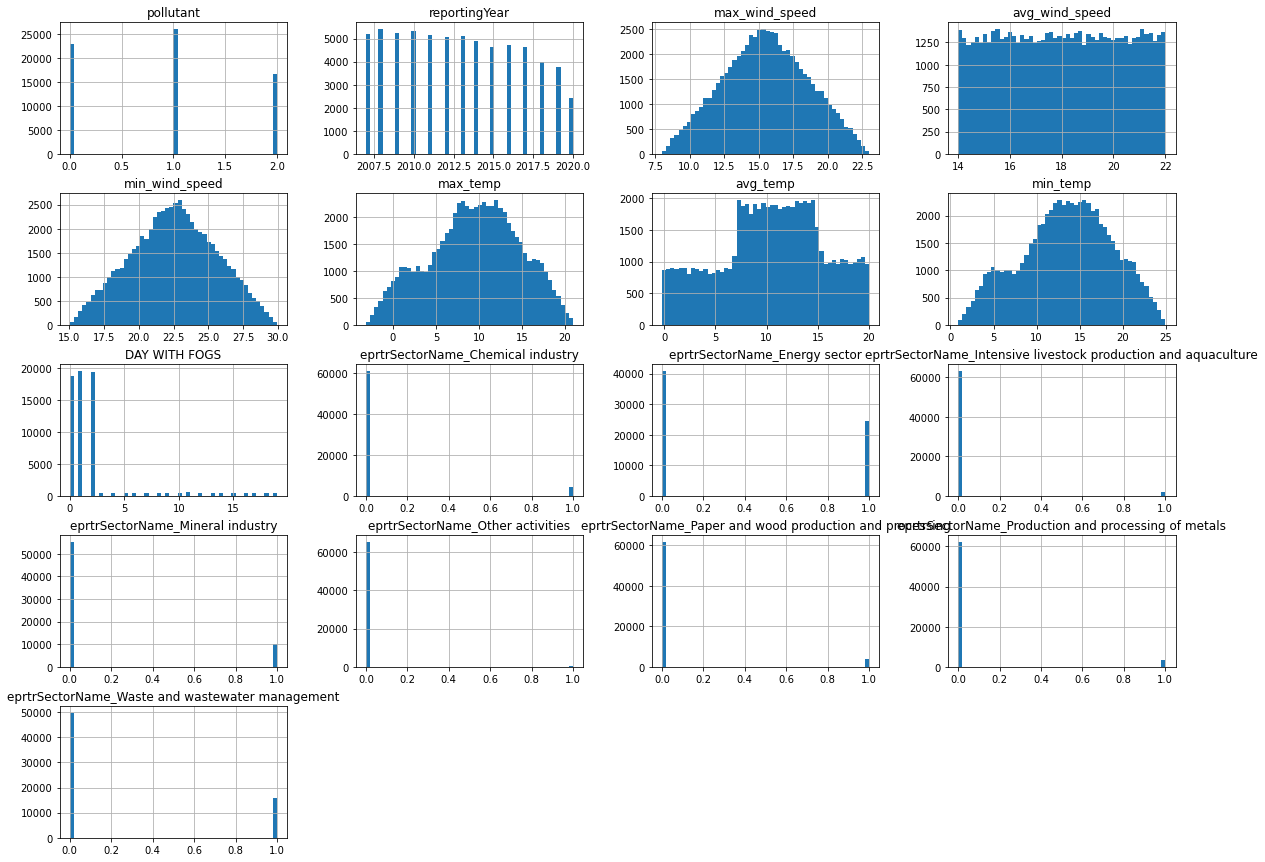

In [145]:
# Representación gráfica de la distribución de los atributos
df_new.hist(bins=50, figsize=(20,15))
plt.show()

In [146]:
year_grupo = pd.cut(x=df_new['reportingYear'],
                    bins=[2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,float('inf')], 
                    labels=["2007-2008","2008-2009","2009-2010","2010-2011","2011-2012","2012-2013","2013-2014","2014-2015","2015-2016","2016-2017","2017-2018","2018-2019","2019-2020","2020+"])
year_total = year_grupo.value_counts().sort_index()

year_indexes = year_total.index.values
year_valores = year_total.values

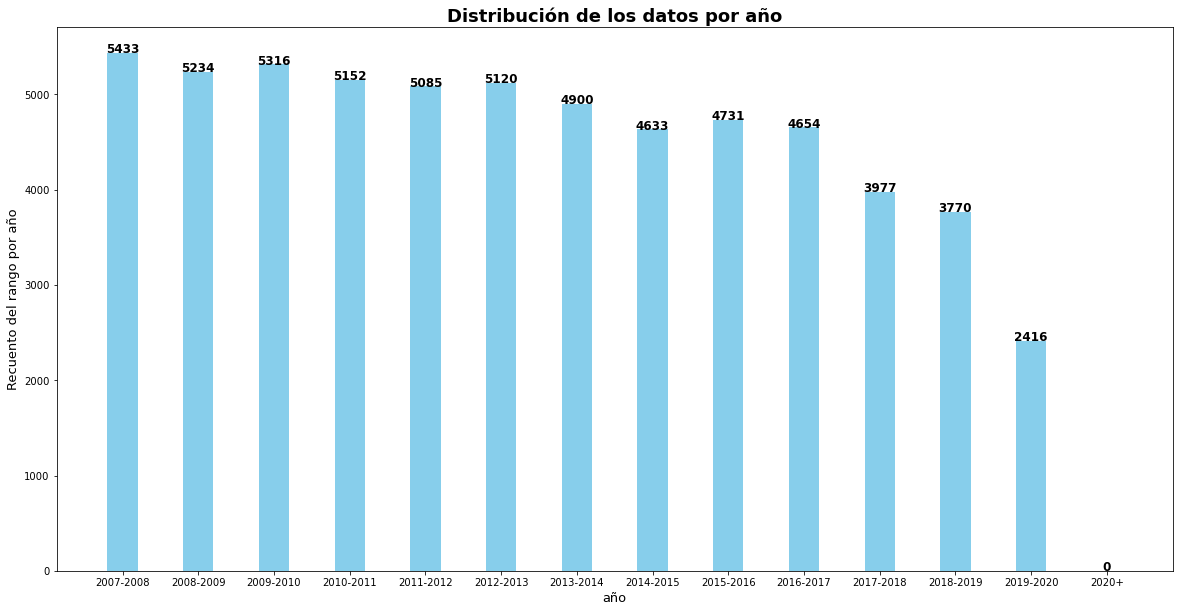

In [147]:
plt.figure(figsize = (20, 10))
 
# Creación de una gráfica bar plot para representar la distribución de la información por año
year_bar = plt.bar(year_indexes, year_valores, color ='Skyblue', width = 0.4)
for i, rectangle in enumerate(year_bar):
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width()/2, height+2,
             year_valores[i], horizontalalignment='center', weight='bold', fontsize=12)
 
plt.xlabel("año", fontsize=13)
plt.ylabel("Recuento del rango por año", fontsize=13)
plt.title("Distribución de los datos por año", weight='bold', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Gráfica de la cantidad por año de los diferentes tipos de contaminantes')

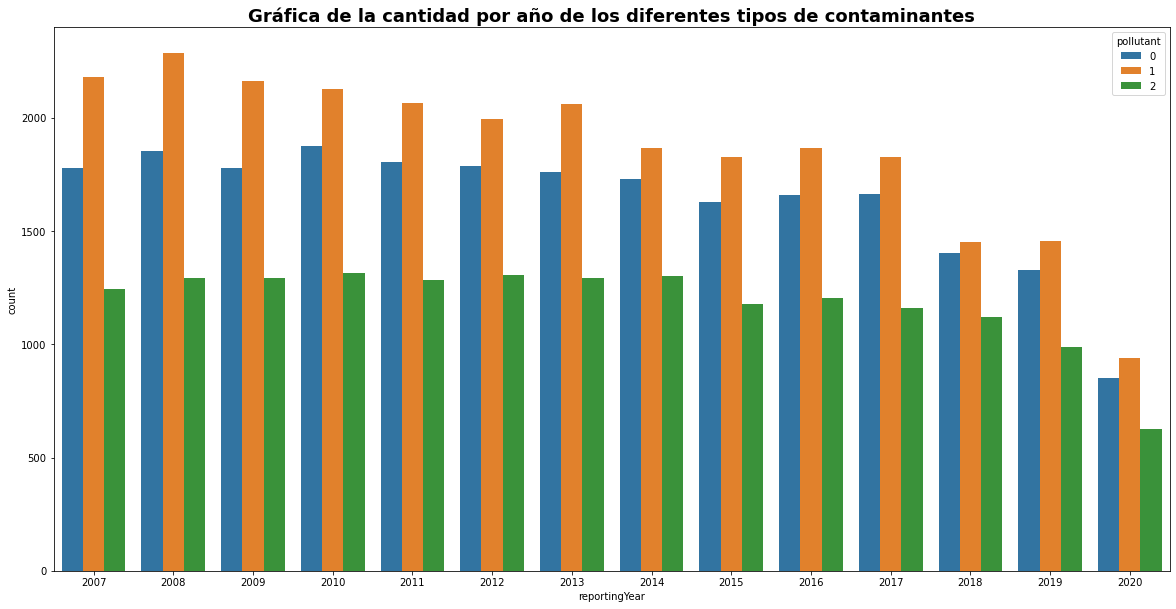

In [150]:
# Creación de una gráfica por año de los diferentes tipos de contaminantes
plt.figure(figsize=[20,10])
sns.countplot(x = 'reportingYear', hue = 'pollutant', data = df)
plt.title('Gráfica de la cantidad por año de los diferentes tipos de contaminantes', weight='bold', fontsize=18)

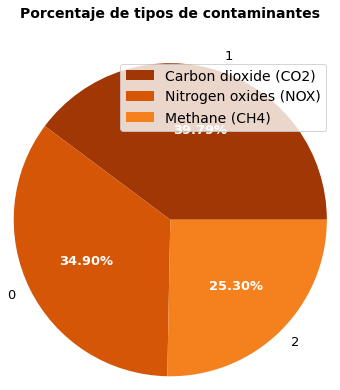

In [151]:
#Creación de una gráfica para representar el porcentaje por cada tipo de contaminantes
pollutant = df['pollutant'].value_counts()

fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=pollutant, labels=pollutant.index, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("YlOrBr_r"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Porcentaje de tipos de contaminantes', y=1.1, weight='bold', fontsize=14)
ax.legend(labels=['Carbon dioxide (CO2)', 'Nitrogen oxides (NOX)','Methane (CH4)'], fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

## Escalado de los datos

In [152]:
# Conjunto de datos general
X_df = df_new.drop("pollutant", axis=1)
y_df = df_new["pollutant"].copy()

In [153]:
#Escalado de los datos en ambos dataset
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_df)
X_prueba = scaler.fit_transform(df_prueba)

In [154]:
# Transformación a un DataFrame de Pandas
X_scaled = pd.DataFrame(X_scaled, columns=X_df.columns, index=X_df.index)
X_prueba = pd.DataFrame(X_prueba, columns=df_prueba.columns, index=df_prueba.index)

In [155]:
X_scaled

,reportingYear,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,eprtrSectorName_Chemical industry,eprtrSectorName_Energy sector,eprtrSectorName_Intensive livestock production and aquaculture,eprtrSectorName_Mineral industry,eprtrSectorName_Other activities,eprtrSectorName_Paper and wood production and processing,eprtrSectorName_Production and processing of metals,eprtrSectorName_Waste and wastewater management
0,0.333333,-0.085301,-0.925581,-0.256450,-0.926342,-0.825135,-0.544775,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.833333,0.947991,0.337746,-0.179189,-0.574876,-0.405794,-0.227926,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.000000,-0.628769,-0.828265,-1.244925,-1.109478,-0.923648,-0.688052,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.166667,-0.827348,-0.473278,-1.145680,0.170207,-0.058661,0.200230,-0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.833333,0.368060,0.546010,-0.229670,0.278671,0.090483,0.316883,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65622,0.333333,0.002340,0.715435,0.779473,0.076420,0.195135,0.380229,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
65623,1.000000,0.397185,0.849480,1.160252,-0.575813,-0.445710,-0.498498,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
65624,-0.333333,-0.230912,-0.731019,-0.407834,-0.021294,0.223923,0.057157,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
65625,1.000000,-1.073733,-0.759736,-1.474189,-0.539722,-0.378879,-0.603947,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Balanceo del dataset

In [156]:
#Importamos los paquetes
from imblearn.over_sampling import RandomOverSampler

#Inicialización de los métodos de sobremuestreo
#ROS
ros = RandomOverSampler()#random_state = 0

In [157]:
#ROS. Duplica muestras de la clase menos representadas
X_Ros, y_Ros = ros.fit_resample(X_scaled, y_df)
X_Ros

,reportingYear,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,eprtrSectorName_Chemical industry,eprtrSectorName_Energy sector,eprtrSectorName_Intensive livestock production and aquaculture,eprtrSectorName_Mineral industry,eprtrSectorName_Other activities,eprtrSectorName_Paper and wood production and processing,eprtrSectorName_Production and processing of metals,eprtrSectorName_Waste and wastewater management
0,0.333333,-0.085301,-0.925581,-0.256450,-0.926342,-0.825135,-0.544775,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.833333,0.947991,0.337746,-0.179189,-0.574876,-0.405794,-0.227926,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.000000,-0.628769,-0.828265,-1.244925,-1.109478,-0.923648,-0.688052,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.166667,-0.827348,-0.473278,-1.145680,0.170207,-0.058661,0.200230,-0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.833333,0.368060,0.546010,-0.229670,0.278671,0.090483,0.316883,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78340,0.000000,-0.450152,-0.666652,0.048577,-1.224894,-1.504937,-1.350432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
78341,0.500000,0.926900,0.347404,-0.262920,-0.162904,-0.223943,-0.149295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
78342,1.000000,-0.192554,0.186619,0.816656,-1.218068,-1.029911,-0.919225,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
78343,-0.500000,0.349355,0.964064,0.747903,-0.969792,-0.810406,-0.987070,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [158]:
y_Ros.value_counts()

0    26115
1    26115
2    26115
Name: pollutant, dtype: int64

## creacióny entranamiento del modelo utilizando Bosques Aleatorios

In [159]:
#División del dataset en conjunto de entramiento y prueba para poder validar el comportamiento del modelo 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_Ros, y_Ros, test_size = 0.25, random_state=0)

In [160]:
# Importación de la librería 
from sklearn.ensemble import RandomForestClassifier

#Creación del modelo
ranforest = RandomForestClassifier()
ranforest.fit(X_train, y_train)

RandomForestClassifier()

In [161]:
#Prediccion con el conjunto de validación
y_pred = ranforest.predict(X_val)

In [162]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.789


In [163]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[4598, 1563,  383],
       [1498, 4693,  372],
       [ 135,  185, 6160]], dtype=int64)

d:\miniconda3\envs\proyectos1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


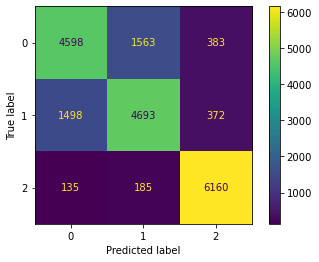

In [164]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de validación
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(ranforest, X_val, y_val, values_format='3g')

In [165]:
#Descripción de los resultados de las diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[4598 1563  383]
 [1498 4693  372]
 [ 135  185 6160]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      6544
           1       0.73      0.72      0.72      6563
           2       0.89      0.95      0.92      6480

    accuracy                           0.79     19587
   macro avg       0.79      0.79      0.79     19587
weighted avg       0.79      0.79      0.79     19587



In [166]:
#Realizamos una nueva predicion con el conjunto de datos de pruebas proporcionado
y_pred_pruebas = ranforest.predict(X_prueba)

In [167]:
#Guardamos los resultados de la predicción
pd.DataFrame(y_pred_pruebas).to_csv("results.csv")

In [168]:
resultados=pd.read_csv('results.csv')

In [169]:
resultados

,Unnamed: 0,0
0,0,1
1,1,2
2,2,0
3,3,2
4,4,1
...,...,...
24475,24475,0
24476,24476,0
24477,24477,2
24478,24478,1
